In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [25]:
Company = pd.read_excel("Company_Data2015-1.xlsx")
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [26]:
df_dict = pd.read_excel('Data_Dictionary.xlsx')
df_dict.head()

,#,Field Name,Description,New Field Name
0,1,Co_Code,Company Code,Co_Code
1,2,Co_Name,Company Name,Co_Name
2,3,Networth Next Year,Value of a company as on 2016 - Next Year(diff...,Networth_Next_Year
3,4,Equity Paid Up,Amount that has been received by the company t...,Equity_Paid_Up
4,5,Networth,Value of a company as on 2015 - Current Year,Networth


column names are changed for furthur analysis

In [27]:
Company.columns = df_dict['New Field Name'].to_list()
Company.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Curr_Assets', 'Curr_Liab_and_Prov',
       'Total_Assets_to_Liab', 'Gross_Sales', 'Net_Sales', 'Other_Income',
       'Value_Of_Output', 'Cost_of_Prod', 'Selling_Cost', 'PBIDT', 'PBDT',
       'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Rev_earn_in_forex',
       'Rev_exp_in_forex', 'Capital_exp_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Opr', 'Cash_Flow_From_Inv',
       'Cash_Flow_From_Fin', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Prod_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc',
       'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc',
       'ROG_CP_perc', 'ROG_Rev_earn_in_forex_perc',
  

In [28]:
pd.set_option('display.max_rows', 500)

In [29]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Co_Code                            3586 non-null   int64  
 1   Co_Name                            3586 non-null   object 
 2   Networth_Next_Year                 3586 non-null   float64
 3   Equity_Paid_Up                     3586 non-null   float64
 4   Networth                           3586 non-null   float64
 5   Capital_Employed                   3586 non-null   float64
 6   Total_Debt                         3586 non-null   float64
 7   Gross_Block                        3586 non-null   float64
 8   Net_Working_Capital                3586 non-null   float64
 9   Curr_Assets                        3586 non-null   float64
 10  Curr_Liab_and_Prov                 3586 non-null   float64
 11  Total_Assets_to_Liab               3586 non-null   float

There are 3586 rows and 67 rows are observed in this dataset
There are null values in the dataset

#### First, let us check the number of rows (observations) and the number of columns (variables).

In [30]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [31]:
Company.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.0,16065.388734,19776.817379,4.00,3029.2500,6077.500,24269.5000,72493.00
Networth_Next_Year,3586.0,725.045251,4769.681004,-8021.60,3.9850,19.015,123.8025,111729.10
Equity_Paid_Up,3586.0,62.966584,778.761744,0.00,3.7500,8.290,19.5175,42263.46
Networth,3586.0,649.746299,4091.988792,-7027.48,3.8925,18.580,117.2975,81657.35
Capital_Employed,3586.0,2799.611054,26975.135385,-1824.75,7.6025,39.090,226.6050,714001.25
Total_Debt,3586.0,1994.823779,23652.842746,-0.72,0.0300,7.490,72.3500,652823.81
Gross_Block,3586.0,594.178829,4871.547802,-41.19,0.5700,15.870,131.8950,128477.59
Net_Working_Capital,3586.0,410.809665,6301.218546,-13162.42,0.9425,10.145,61.1750,223257.56
Curr_Assets,3586.0,1960.349172,22577.570829,-0.91,4.0000,24.540,135.2775,721166.00
Curr_Liab_and_Prov,3586.0,391.992078,2675.001631,-0.23,0.7325,9.225,65.6500,83232.98


In [32]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,16065.39,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,...,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,19776.82,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,...,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,4.00,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,...,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3029.25,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,...,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,6077.50,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,...,8.07,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53
75%,24269.50,123.80,19.52,117.30,226.60,72.35,131.90,61.17,135.28,65.65,...,18.99,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91
max,72493.00,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,83232.98,...,19233.33,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00


Minimum Networth_Next_Year - (-8021)
Maximum Networth_Next_Year  - (111729.10)
Maximum Total Debt - 652823.81

In [33]:
dups = Company.duplicated().sum()
dups

0

There are no duplicates

In [34]:
Company.isnull().sum().sum()

118

there are 118 missing values. For the Credit risk analysis ,missing values are not treated using normal methods mostly imputation methods are used
Before treating missing,it is important to treat outliers for the analysis

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 [Text(1, 0, 'Co_Code'),
  Text(2, 0, 'Networth_Next_Year'),
  Text(3, 0, 'Equity_Paid_Up'),
  Text(4, 0, 'Networth'),
  Text(5, 0, 'Capital_Employed'),
  Text(6, 0, 'Total_Debt'),
  Text(7, 0, 'Gross_Block'),
  Text(8, 0, 'Net_Working_Capital'),
  Text(9, 0, 'Curr_Assets'),
  Text(10, 0, 'Curr_Liab_and_Prov'),
  Text(11, 0, 'Total_Assets_to_Liab'),
  Text(12, 0, 'Gross_Sales'),
  Text(13, 0, 'Net_Sales'),
  Text(14, 0, 'Other_Income'),
  Text(15, 0, 'Value_Of_Output'),
  Text(16, 0, 'Cost_of_Prod'),
  Text(17, 0, 'Selling_Cost'),
  Text(18, 0, 'PBIDT'),
  Text(19, 0, 'PBDT'),
  Text(20, 0, 'PBIT'),
  Text(21, 0, 'PBT'),
  Text(22, 0, 'PAT'),
  Text(23, 0, 'Adjusted_PAT'),
  Text(24, 0, 'CP'),

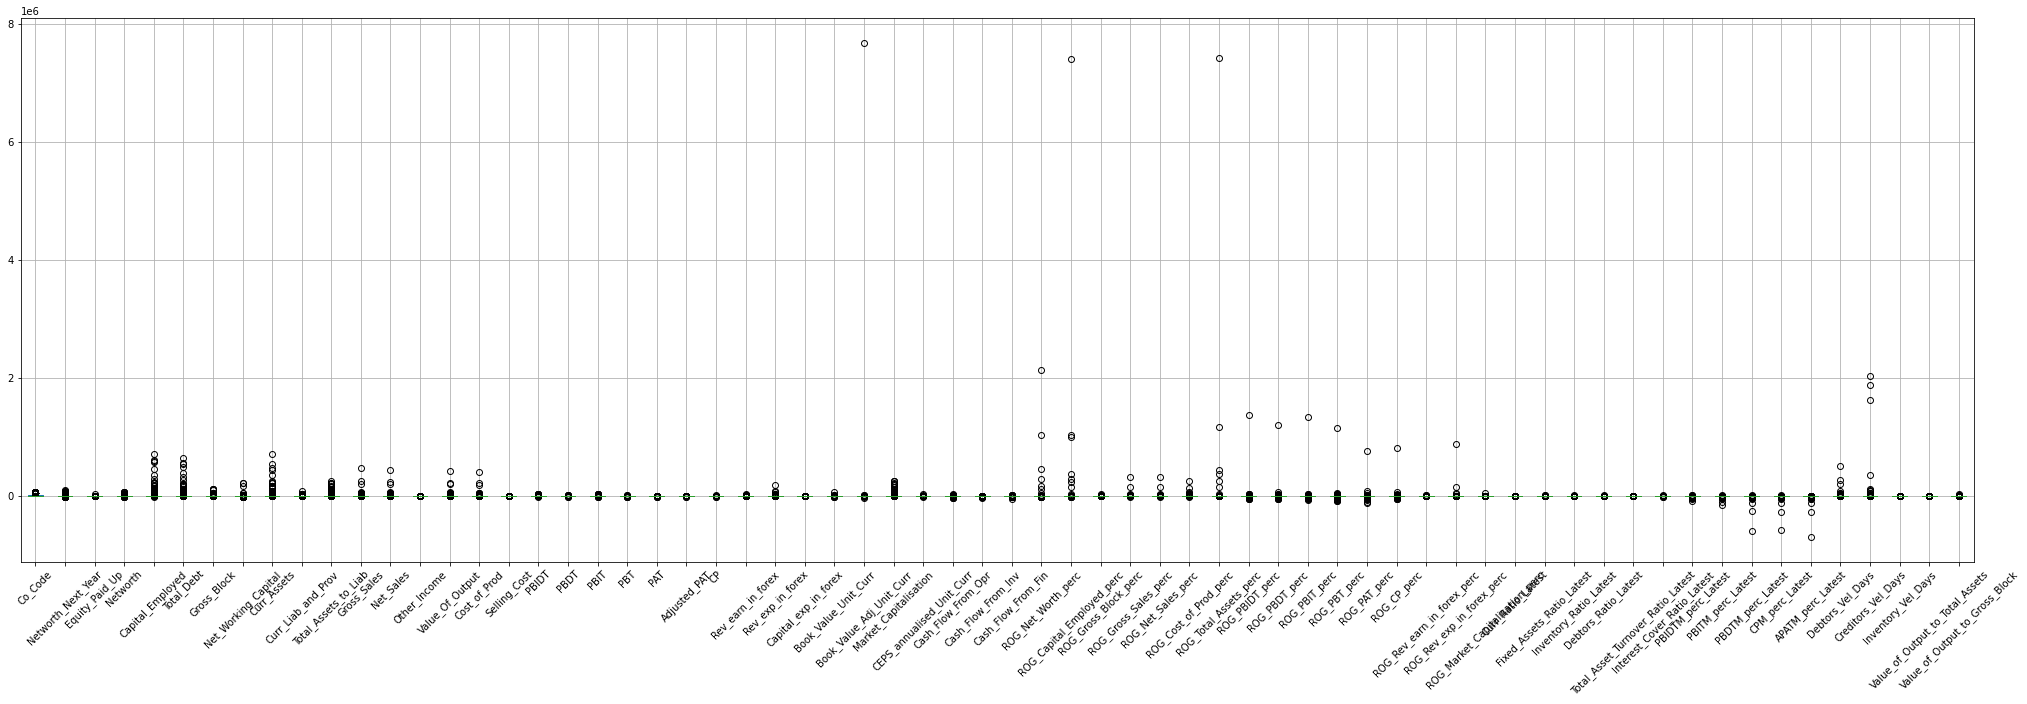

In [35]:
plt.figure(figsize=(35,10))
Company.boxplot()
plt.xticks(rotation=45)


There are outliers in most of the variables

In [36]:
Company.isnull().sum().sum()

118

In [37]:
net = Company.sort_values(by="Networth",ascending=False)
net.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
3584,12001,NTPC,91293.70,8245.46,81657.35,173099.14,85995.34,128477.59,11449.79,42353.59,...,28.12,20.55,23.39,19.55,11.99,32,69,42.00,0.36,0.68
3585,15542,Bharti Airtel,111729.10,1998.70,78270.80,104241.00,21569.70,100084.90,-12145.30,11947.10,...,42.47,22.88,34.04,25.97,6.37,18,74,0.00,0.42,0.49
3583,12002,I O C L,88134.31,2427.95,67969.97,140686.75,55245.01,121643.45,6376.84,89609.82,...,8.09,6.69,7.31,5.69,4.29,7,30,48.00,1.42,3.24
3577,566,Tata Steel,46637.38,971.41,66663.89,101142.12,28198.44,42583.38,-3727.04,12669.15,...,22.77,16.12,17.72,13.77,7.12,5,102,102.00,0.43,0.81
3581,4987,HDFC Bank,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,...,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.60,7.76


### Bi-variate analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'NTPC'),
  Text(1, 0, 'Bharti Airtel'),
  Text(2, 0, 'I O C L'),
  Text(3, 0, 'Tata Steel'),
  Text(4, 0, 'HDFC Bank'),
  Text(5, 0, 'Infosys'),
  Text(6, 0, 'Axis Bank'),
  Text(7, 0, 'Sardar Sar.Narm.'),
  Text(8, 0, 'S A I L'),
  Text(9, 0, 'General Insuranc')])

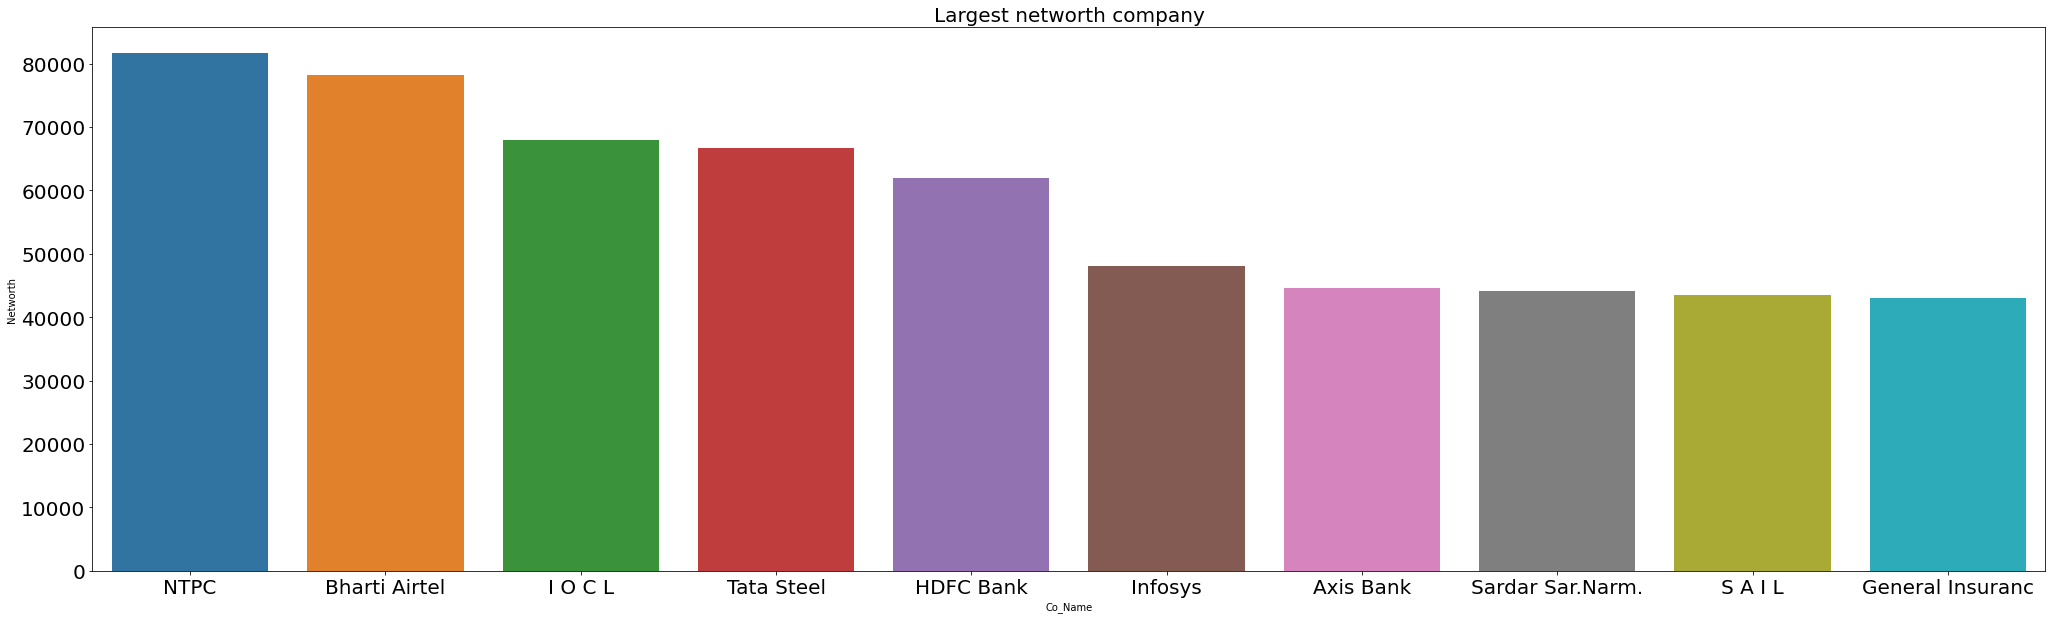

In [38]:
plt.figure(figsize=(35,10))
ax = sns.barplot(x='Co_Name', y='Networth',data=net.head(10))
plt.title("Largest networth company",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

NTPC has highest networth followed by the Bharti Airtel

In [40]:
debt = Company.sort_values(by="Total_Debt",ascending=False)
debt.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
3572,5456,Bank of Baroda,40198.98,443.56,38848.05,714001.25,652823.81,5554.19,0.00,721166.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.67,5.29
3561,5654,Bank of India,26310.46,665.65,27891.59,615142.63,571963.75,5210.13,0.00,542253.81,...,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.81,8.48
3568,7855,Punjab Natl.Bank,35465.36,370.91,37691.97,602355.88,547049.19,5290.13,0.00,482024.22,...,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.81,8.53
3581,4987,HDFC Bank,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,...,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.60,7.76
3579,5554,Axis Bank,53164.91,474.10,44676.51,461977.78,402200.22,4497.01,0.00,358193.47,...,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.66,8.43


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bank of Baroda'),
  Text(1, 0, 'Bank of India'),
  Text(2, 0, 'Punjab Natl.Bank'),
  Text(3, 0, 'HDFC Bank'),
  Text(4, 0, 'Axis Bank'),
  Text(5, 0, 'IDBI Bank'),
  Text(6, 0, 'Syndicate Bank'),
  Text(7, 0, 'Oriental Bank'),
  Text(8, 0, 'Corporation Bank'),
  Text(9, 0, 'H D F C')])

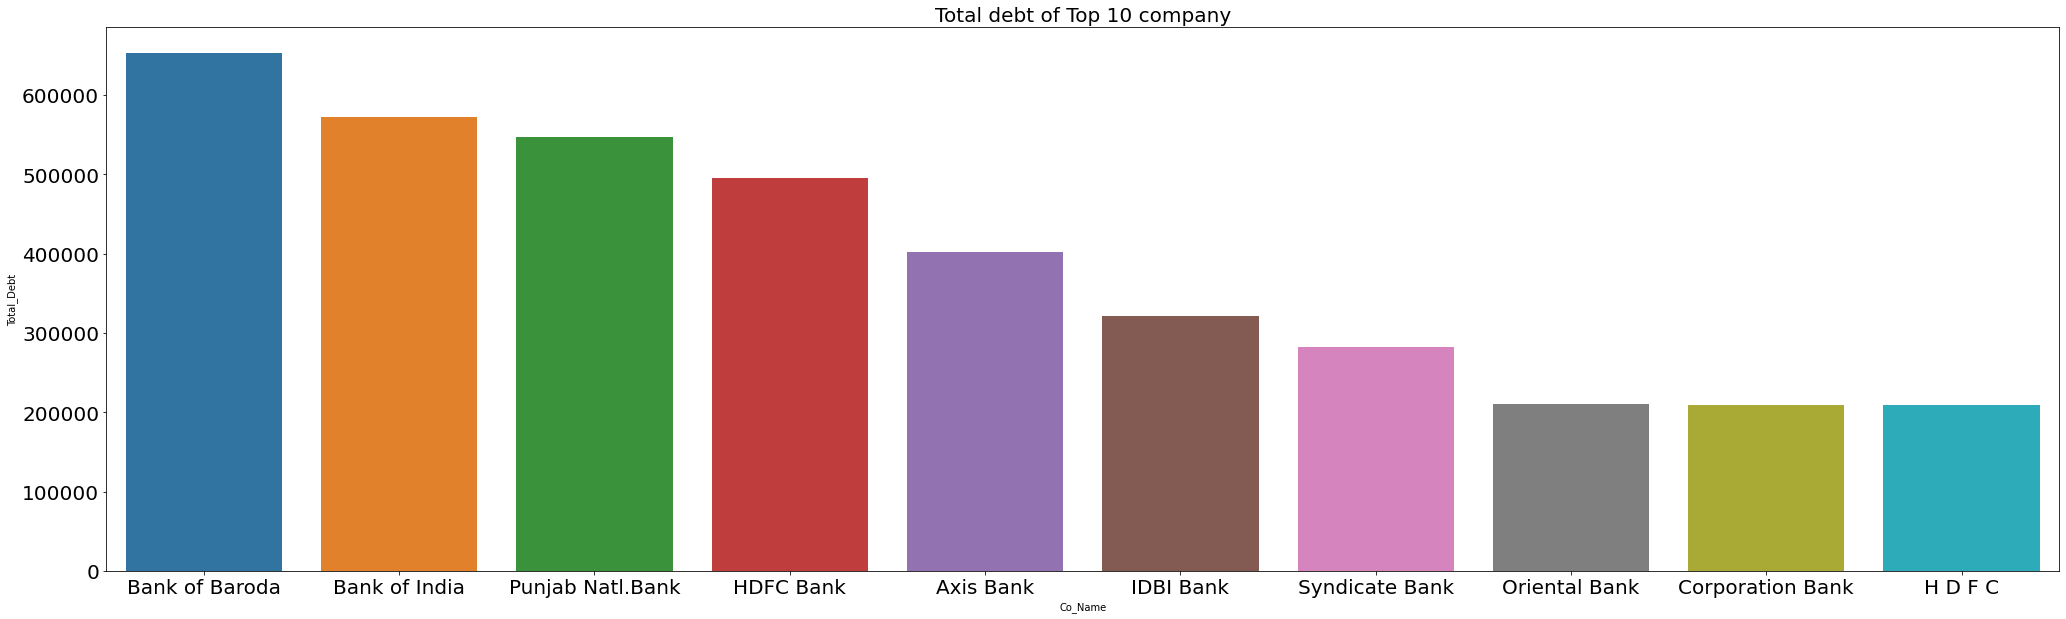

In [42]:

plt.figure(figsize=(35,10))
ax = sns.barplot(x='Co_Name', y='Total_Debt',data=debt.head(10))
plt.title("Total debt of Top 10 company",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

Highest debt Company is Bank of Baroda
Second Highest is Bank of india

In [45]:
C_assests = Company.sort_values(by="Curr_Assets",ascending=False)
C_assests.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
3572,5456,Bank of Baroda,40198.98,443.56,38848.05,714001.25,652823.81,5554.19,0.00,721166.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.67,5.29
3561,5654,Bank of India,26310.46,665.65,27891.59,615142.63,571963.75,5210.13,0.00,542253.81,...,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.81,8.48
3568,7855,Punjab Natl.Bank,35465.36,370.91,37691.97,602355.88,547049.19,5290.13,0.00,482024.22,...,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.81,8.53
3581,4987,HDFC Bank,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,...,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.60,7.76
3579,5554,Axis Bank,53164.91,474.10,44676.51,461977.78,402200.22,4497.01,0.00,358193.47,...,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.66,8.43


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bank of Baroda'),
  Text(1, 0, 'Bank of India'),
  Text(2, 0, 'Punjab Natl.Bank'),
  Text(3, 0, 'HDFC Bank'),
  Text(4, 0, 'Axis Bank'),
  Text(5, 0, 'IDBI Bank'),
  Text(6, 0, 'Syndicate Bank'),
  Text(7, 0, 'H D F C'),
  Text(8, 0, 'Power Fin.Corpn.'),
  Text(9, 0, 'Rural Elec.Corp.')])

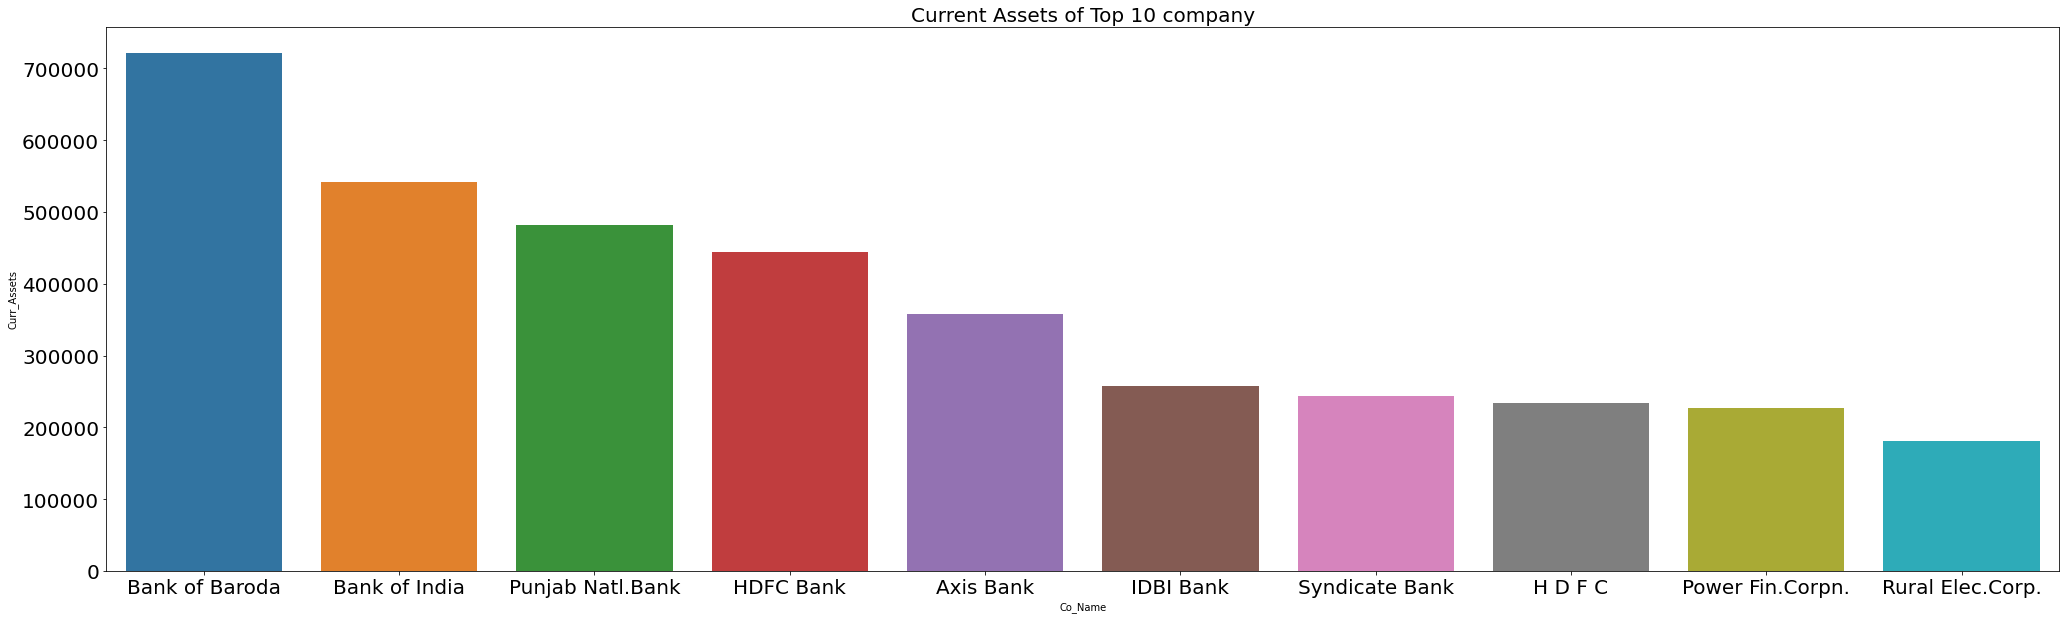

In [46]:

plt.figure(figsize=(35,10))
ax = sns.barplot(x='Co_Name', y='Curr_Assets',data=C_assests.head(10))
plt.title("Current Assets of Top 10 company",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

Highest current assests company is Bank of Baroda
Second highest current assests company is Bank of India

In [47]:
Company.corr()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
Co_Code,1.00,-0.05,-0.01,-0.06,-0.04,-0.04,-0.04,-0.02,-0.04,-0.06,...,0.00,-0.01,-0.01,-0.01,-0.01,-0.00,-0.02,-0.05,0.12,0.04
Networth_Next_Year,-0.05,1.00,0.36,0.97,0.59,0.48,0.74,0.24,0.48,0.78,...,0.01,0.01,0.00,0.00,0.00,-0.01,-0.01,-0.03,-0.02,-0.01
Equity_Paid_Up,-0.01,0.36,1.00,0.39,0.14,0.08,0.27,0.05,0.06,0.17,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.02,-0.03,-0.00
Networth,-0.06,0.97,0.39,1.00,0.63,0.52,0.74,0.26,0.52,0.80,...,0.00,0.01,0.00,0.00,0.00,-0.01,-0.01,-0.02,-0.03,-0.01
Capital_Employed,-0.04,0.59,0.14,0.63,1.00,0.99,0.26,0.24,0.98,0.62,...,0.00,0.00,0.00,0.00,0.00,-0.01,-0.00,-0.04,-0.01,-0.00
Total_Debt,-0.04,0.48,0.08,0.52,0.99,1.00,0.16,0.23,0.99,0.54,...,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.03,-0.01,-0.00
Gross_Block,-0.04,0.74,0.27,0.74,0.26,0.16,1.00,0.02,0.12,0.69,...,0.00,0.00,0.00,0.00,0.00,-0.01,-0.00,0.00,-0.01,-0.01
Net_Working_Capital,-0.02,0.24,0.05,0.26,0.24,0.23,0.02,1.00,0.29,0.13,...,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.01,-0.03,0.00
Curr_Assets,-0.04,0.48,0.06,0.52,0.98,0.99,0.12,0.29,1.00,0.56,...,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.03,-0.01,-0.00
Curr_Liab_and_Prov,-0.06,0.78,0.17,0.80,0.62,0.54,0.69,0.13,0.56,1.00,...,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.01


In [48]:
Company = Company.drop(['Co_Code', 'Co_Name'], axis = 1)
Company.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05


let's drop the columns Co_Code and Co_name

Checking distribution of all variables

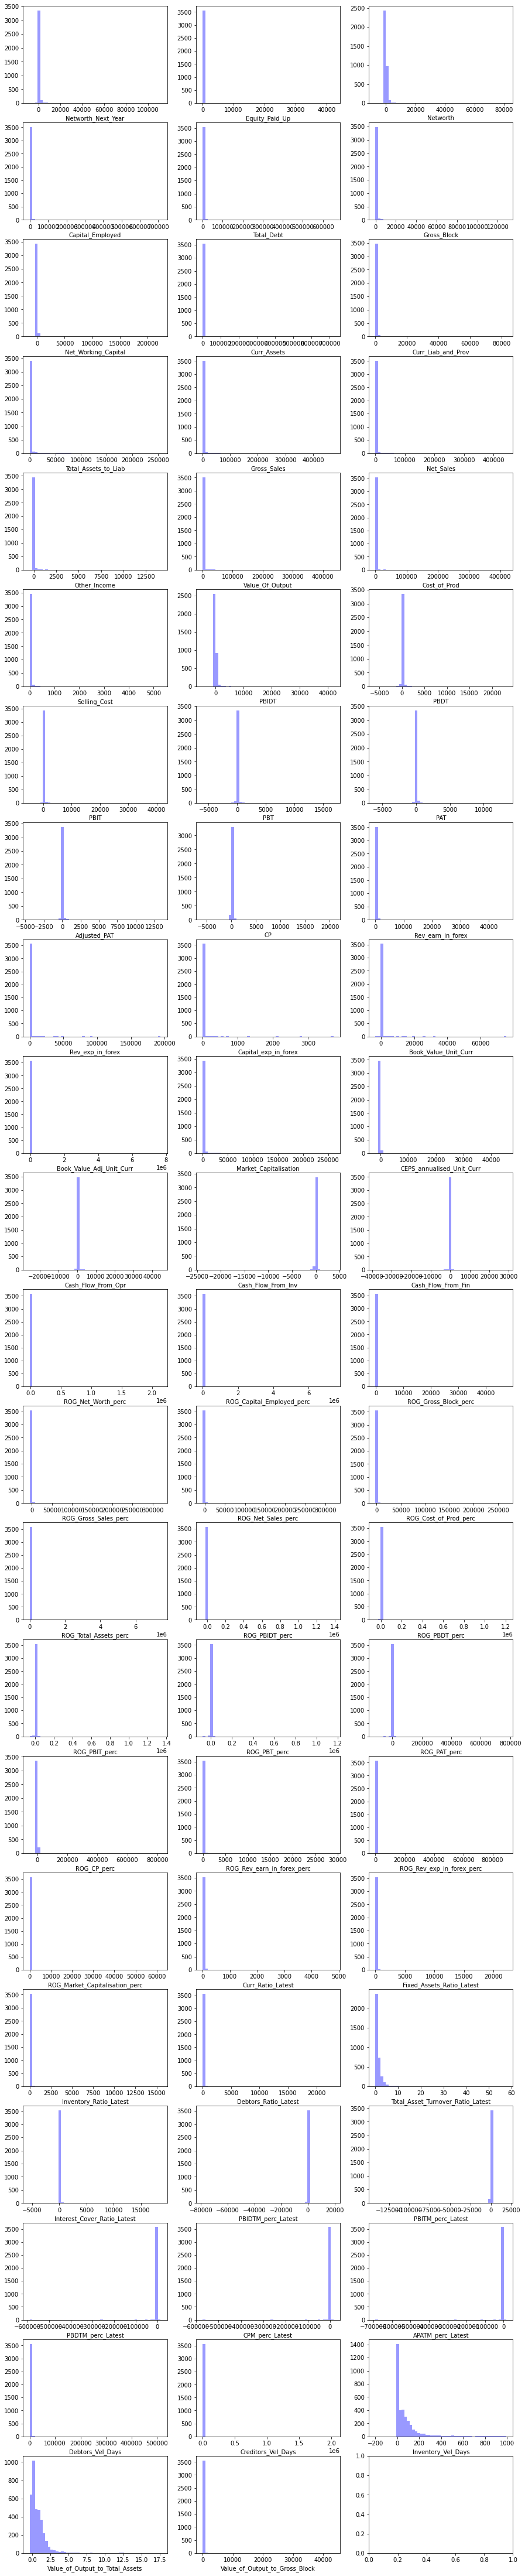

In [49]:
fig, ax = plt.subplots(figsize = (15, 80), nrows = 22, ncols = 3)

for i, col in enumerate(Company.columns):
        sns.distplot(Company[col], ax = ax[i//3, i%3], kde = False, color = 'blue')

Checking skewness in the data

In [70]:
pd.DataFrame(Company.skew().sort_values(ascending=False),columns=['Skewness'])

,Skewness
Book_Value_Adj_Unit_Curr,59.84
ROG_PBIT_perc,58.93
ROG_PBIDT_perc,58.88
ROG_PBDT_perc,58.41
ROG_PBT_perc,57.33
ROG_Market_Capitalisation_perc,57.33
ROG_Total_Assets_perc,57.30
ROG_Rev_exp_in_forex_perc,56.81
ROG_CP_perc,56.79
ROG_Capital_Employed_perc,56.44


None of the variables show perfect normal distribution.Most of the variables have left postive skewness only six variable right negative skewness

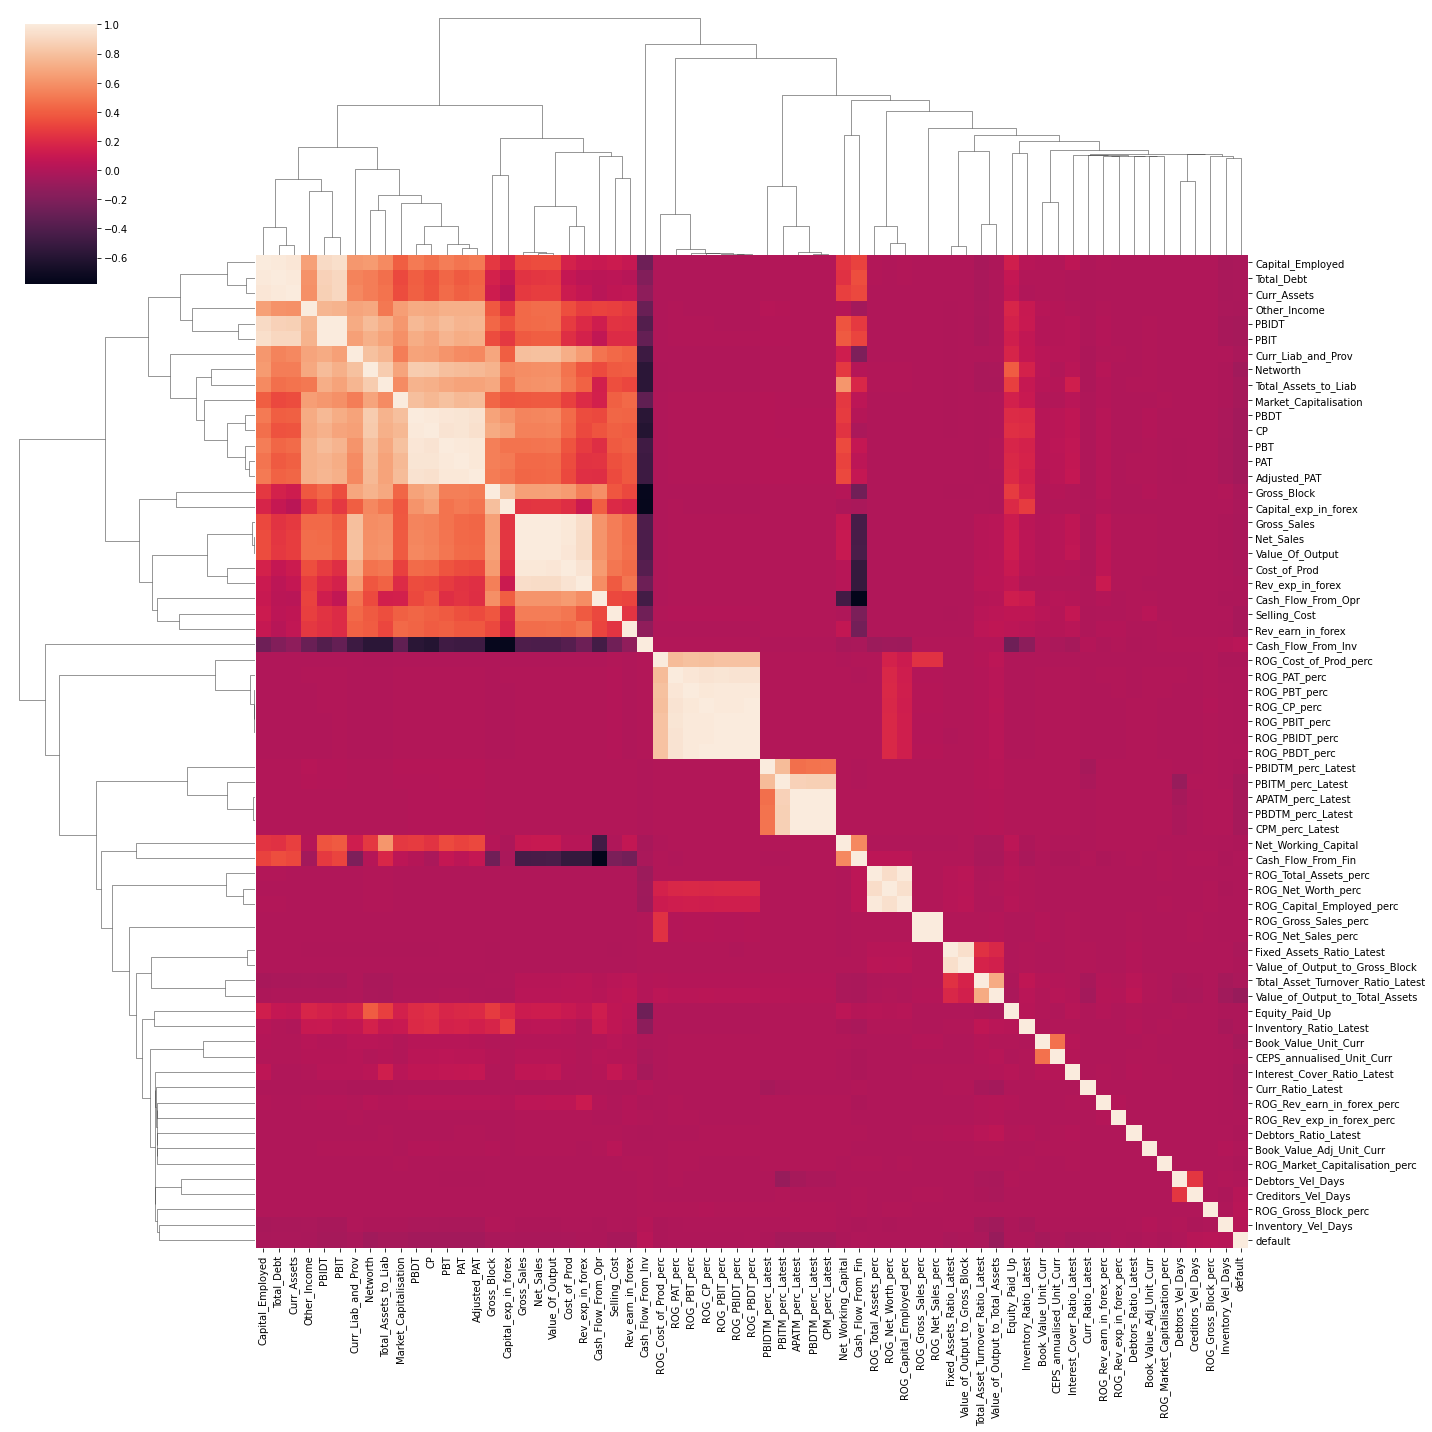

In [71]:
sns.clustermap(Company.corr(),figsize=(20,20))

<AxesSubplot:>

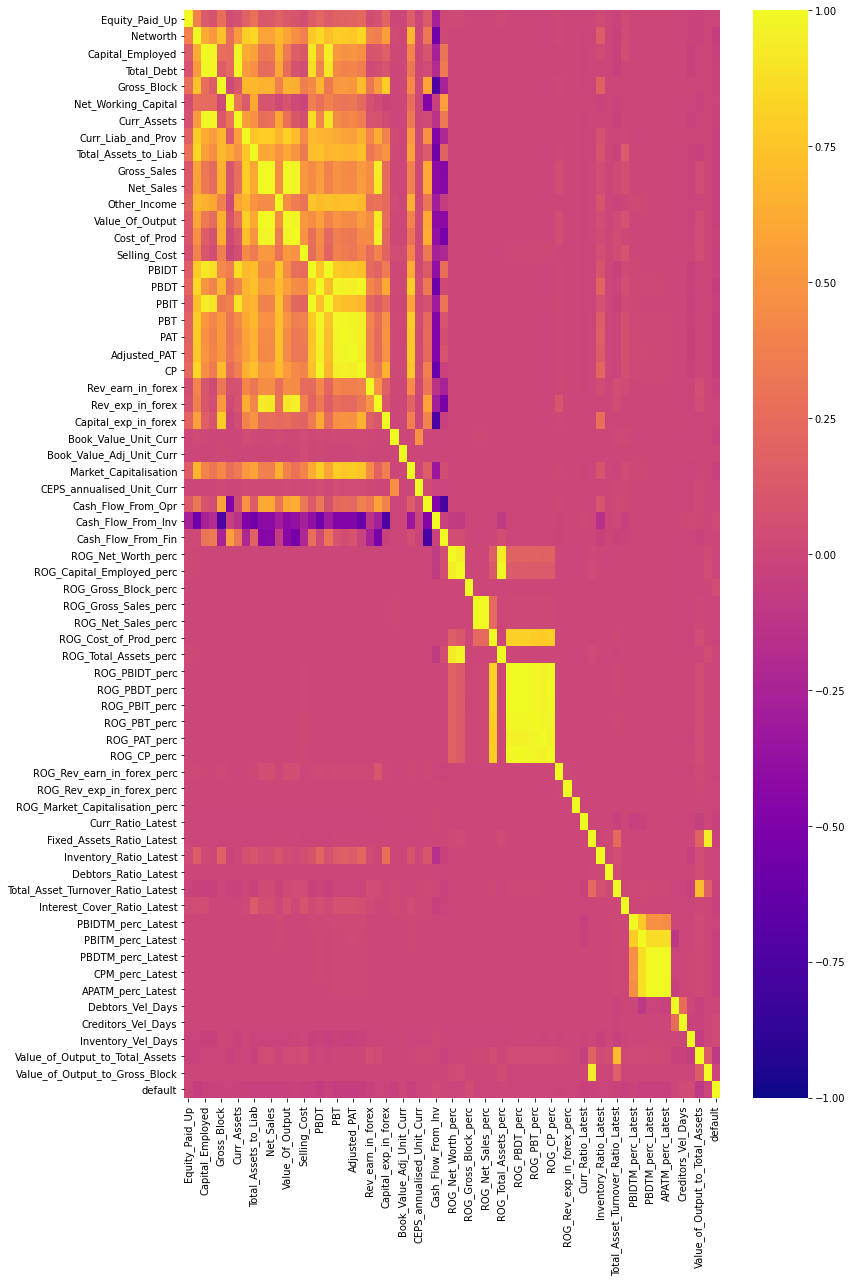

In [72]:
plt.figure(figsize = (12,20))
cor_matrix = Company.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

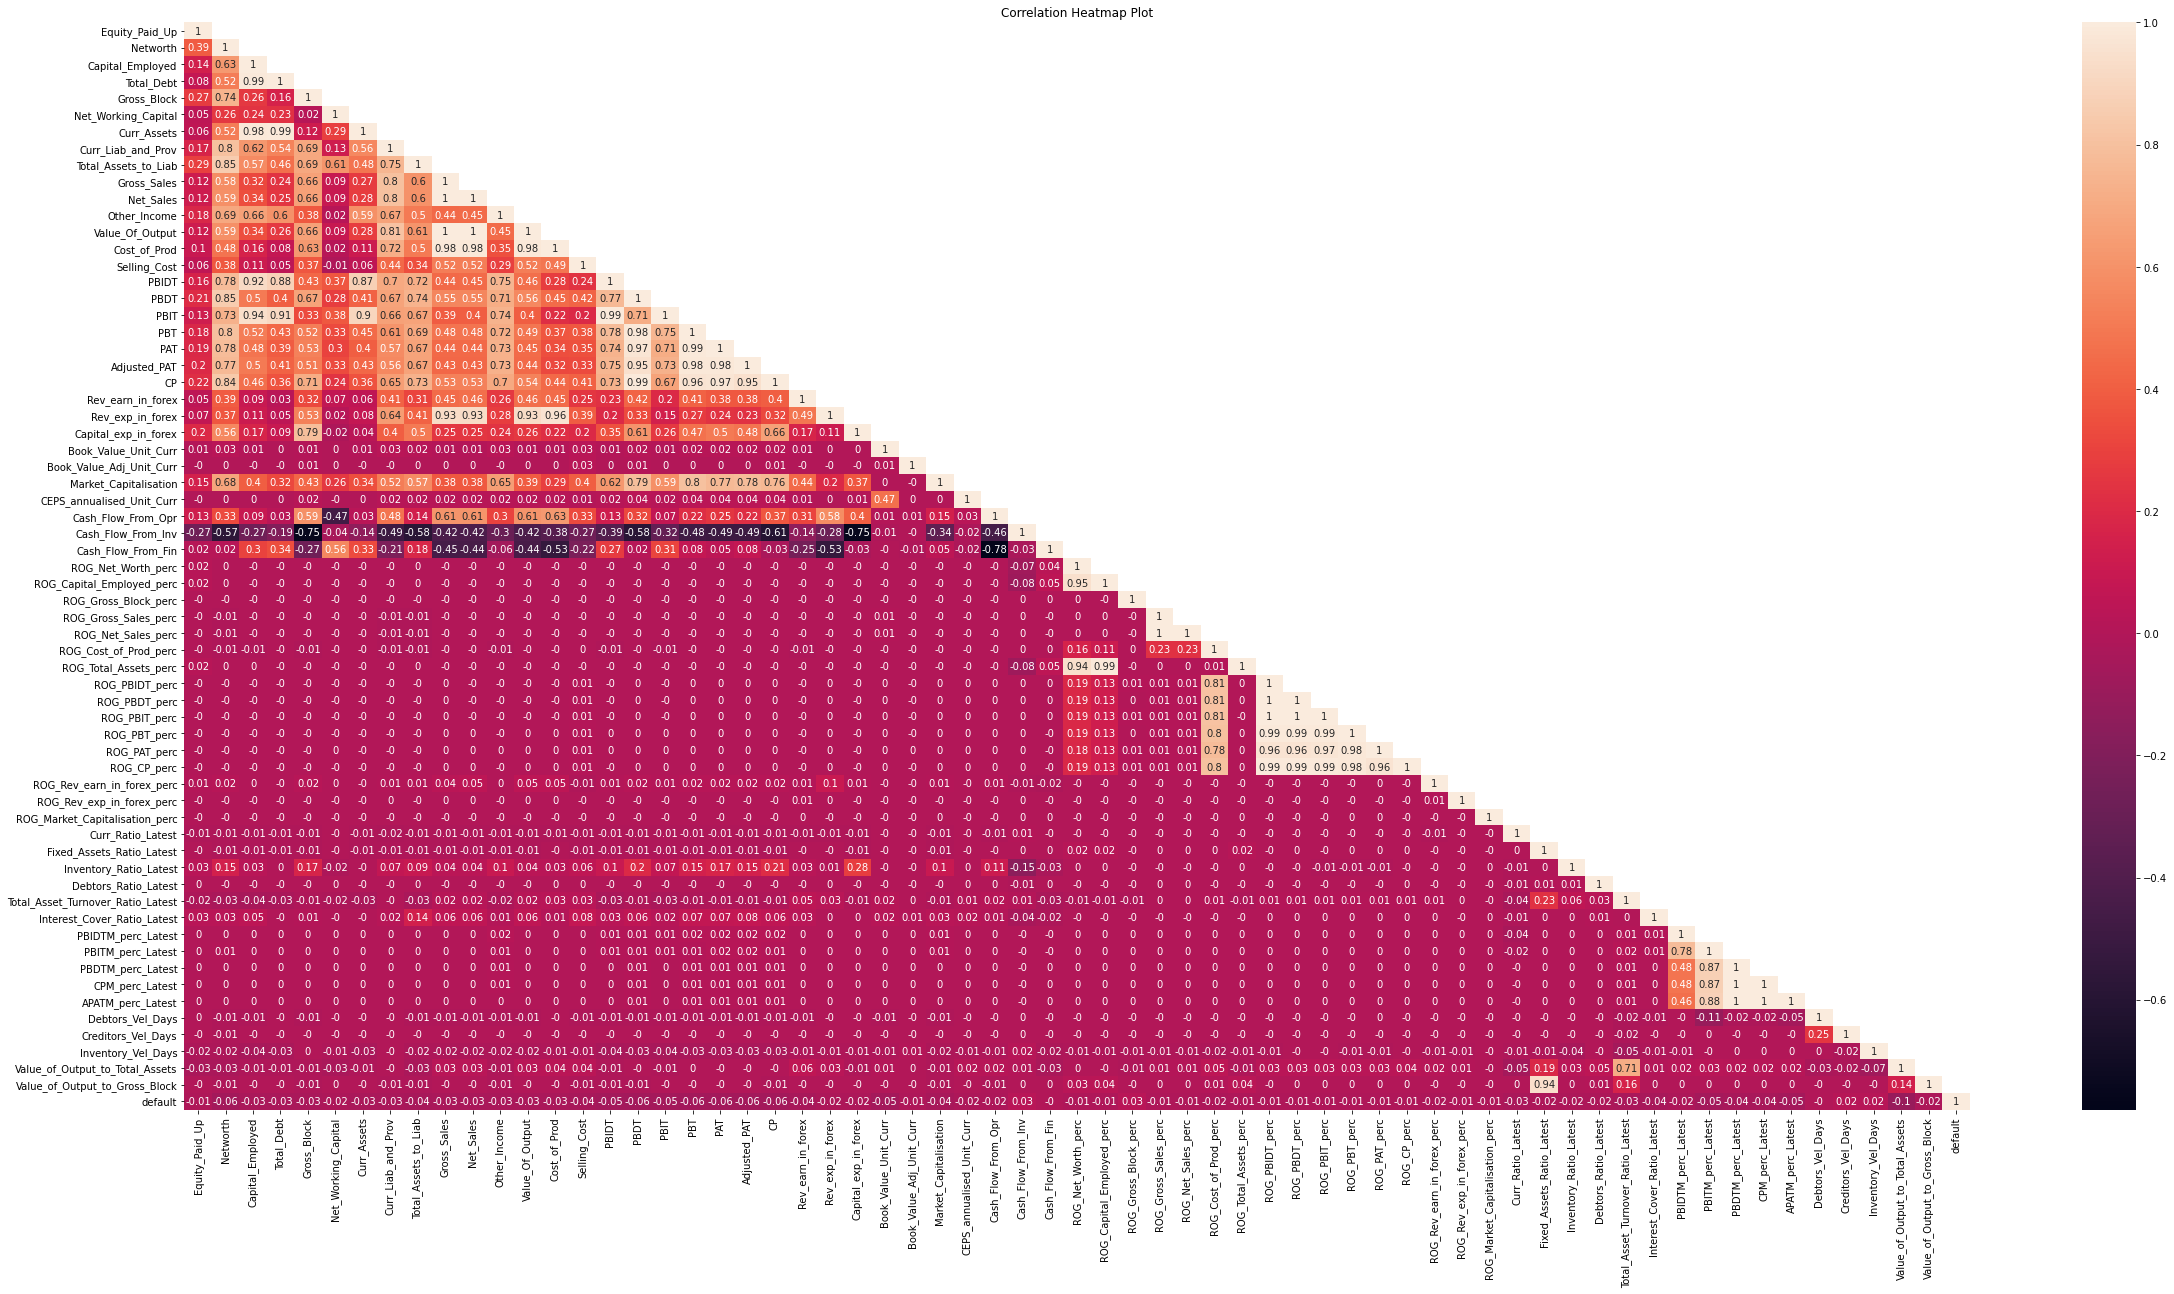

In [73]:
plt.figure(figsize=(40,20))
sns.heatmap(round(Company.corr(),2), annot=True,mask=np.triu(Company.corr(),+1));
plt.title('Correlation Heatmap Plot')
plt.show()

some of the variables are highly postive correlated and where are slightly negative correlated

In [ ]:
fig, ax = plt.subplots(figsize = (20, 180), nrows = 33, ncols = 2)

for i, col in enumerate(Company.columns):
    sns.regplot(x = Company[col], y = Company['Networth_Next_Year'], ax = ax[i//2, i%2])
    
plt.tight_layout(pad = 1.1)

Lets check for missing values in the dataset

In [110]:
print(Company.isnull().sum())

Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block                            0
Net_Working_Capital                    0
Curr_Assets                            0
Curr_Liab_and_Prov                     0
Total_Assets_to_Liab                   0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Prod                           0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP                                     0
Rev_earn_in_forex                      0
Rev_exp_in_forex                       0
Capital_exp_in_f

In [111]:
Company.size

233090

In [112]:
Company.isnull().sum().sum()

118

There are missing values in the dataset

In [113]:
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

In [114]:
Company_X.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,Gross_Sales,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05


Let's check the number of outliers per column

In [115]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [116]:
((Company_X > UL) | (Company_X < LL)).sum()

Equity_Paid_Up                        448
Networth                              650
Capital_Employed                      596
Total_Debt                            583
Gross_Block                           540
Net_Working_Capital                   625
Curr_Assets                           577
Curr_Liab_and_Prov                    581
Total_Assets_to_Liab                  574
Gross_Sales                           554
Net_Sales                             556
Other_Income                          603
Value_Of_Output                       559
Cost_of_Prod                          560
Selling_Cost                          605
PBIDT                                 671
PBDT                                  815
PBIT                                  720
PBT                                   941
PAT                                   959
Adjusted_PAT                          954
CP                                    816
Rev_earn_in_forex                     738
Rev_exp_in_forex                  

In [117]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [118]:
Company_X.isnull().sum()

Equity_Paid_Up                        448
Networth                              650
Capital_Employed                      596
Total_Debt                            583
Gross_Block                           540
Net_Working_Capital                   625
Curr_Assets                           577
Curr_Liab_and_Prov                    581
Total_Assets_to_Liab                  574
Gross_Sales                           554
Net_Sales                             556
Other_Income                          603
Value_Of_Output                       559
Cost_of_Prod                          560
Selling_Cost                          605
PBIDT                                 671
PBDT                                  815
PBIT                                  720
PBT                                   941
PAT                                   959
Adjusted_PAT                          954
CP                                    816
Rev_earn_in_forex                     738
Rev_exp_in_forex                  

Since the outliers are too large in the number.it will affect the model.but Also given the fact that this
is a financial data and the outliers might very well reflect the information which is genuine
in nature. Since data captured from different size of companies

Although most outliers have nan values which is a missing data which should be treated with missing data imputation method .here KNN imputation method is used 

In [119]:
Company_X.isnull().sum().sum()

41473

In [120]:
Company_X.shape

(3586, 64)

In [121]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

Let's visually inspect the missing values in our data

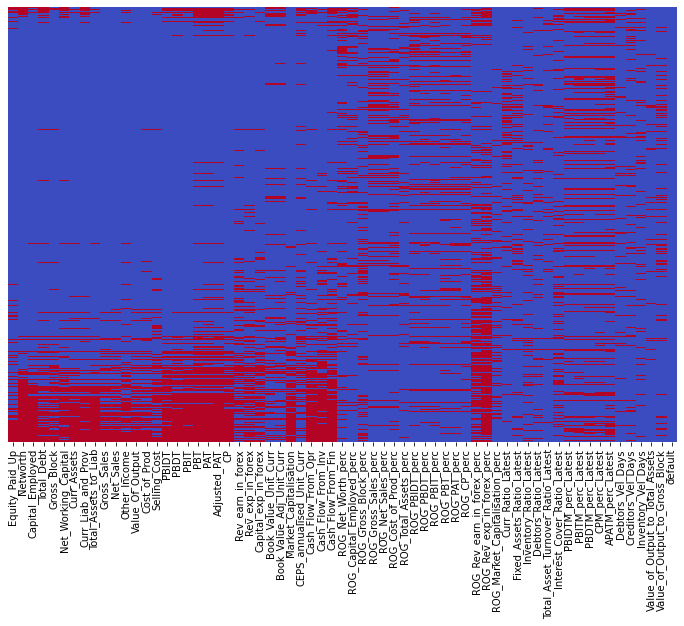

In [122]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

We should inspect total missing values by each row.

In [123]:
Company_sub1.isnull().sum(axis = 1)

0       19
1       34
2       43
3       36
4       35
        ..
3581    30
3582    36
3583    34
3584    30
3585    36
Length: 3586, dtype: int64

In [124]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [125]:
Company_sub1_temp.shape

(1203, 65)

In [126]:
Company_sub1_temp['default'].value_counts()

0    1085
1     118
Name: default, dtype: int64

If we consider availability of features for deciding the observations to be considered, we will end up losing more than 90% of the actual defaulters.



In [127]:
Company_sub1['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [128]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

ROG_Rev_exp_in_forex_perc           0.45
ROG_Rev_earn_in_forex_perc          0.37
Cash_Flow_From_Fin                  0.28
PAT                                 0.27
Adjusted_PAT                        0.27
PBT                                 0.26
APATM_perc_Latest                   0.26
Cash_Flow_From_Inv                  0.24
ROG_Gross_Block_perc                0.23
CP                                  0.23
PBDT                                0.23
Cash_Flow_From_Opr                  0.22
ROG_Net_Worth_perc                  0.21
Rev_earn_in_forex                   0.21
Interest_Cover_Ratio_Latest         0.20
CPM_perc_Latest                     0.20
PBIT                                0.20
PBITM_perc_Latest                   0.20
PBDTM_perc_Latest                   0.19
Capital_exp_in_forex                0.19
Rev_exp_in_forex                    0.19
ROG_Cost_of_Prod_perc               0.19
ROG_Gross_Sales_perc                0.19
PBIDT                               0.19
ROG_Net_Sales_pe

Dropping columns with more than 30% missing values


In [129]:
Company_sub2 = Company_sub1.drop(["ROG_Rev_exp_in_forex_perc","ROG_Rev_earn_in_forex_perc"],
                           axis = 1)

In [130]:
Company_sub2.shape

(3586, 63)

Segregate the predictors and response

In [131]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']


Scale the predictors

It can also be a good idea to scale the target variable for regression predictive modeling problems to make the problem easier to learn.A target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable.

Scaling input and output variables is a critical step in regression

Here StandardScaler is used for preprocessing the data.We will use the default configuration and scale values to subtract the mean to center them on 0.0 and divide by the standard deviation to give the standard deviation of 1.0. First, a StandardScaler instance is defined with default hyperparameters.

Once defined, we can call the fit_transform() function and pass it to our dataset to create a transformed version of our dataset.

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [133]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

Imputing the remaining missing values

In [134]:
from sklearn.impute import KNNImputer

In [135]:
imputer = KNNImputer(n_neighbors=10)

In [136]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)

In [137]:
Company_imputed.isnull().sum()

Equity_Paid_Up                       0
Networth                             0
Capital_Employed                     0
Total_Debt                           0
Gross_Block                          0
Net_Working_Capital                  0
Curr_Assets                          0
Curr_Liab_and_Prov                   0
Total_Assets_to_Liab                 0
Gross_Sales                          0
Net_Sales                            0
Other_Income                         0
Value_Of_Output                      0
Cost_of_Prod                         0
Selling_Cost                         0
PBIDT                                0
PBDT                                 0
PBIT                                 0
PBT                                  0
PAT                                  0
Adjusted_PAT                         0
CP                                   0
Rev_earn_in_forex                    0
Rev_exp_in_forex                     0
Capital_exp_in_forex                 0
Book_Value_Unit_Curr     

Data is scaled and preprocessed before imputating missing data using KNN Imputer.Imputation for completing missing values using k-Nearest Neighbors.

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

Inspect possible correlations between independent variables

<AxesSubplot:>

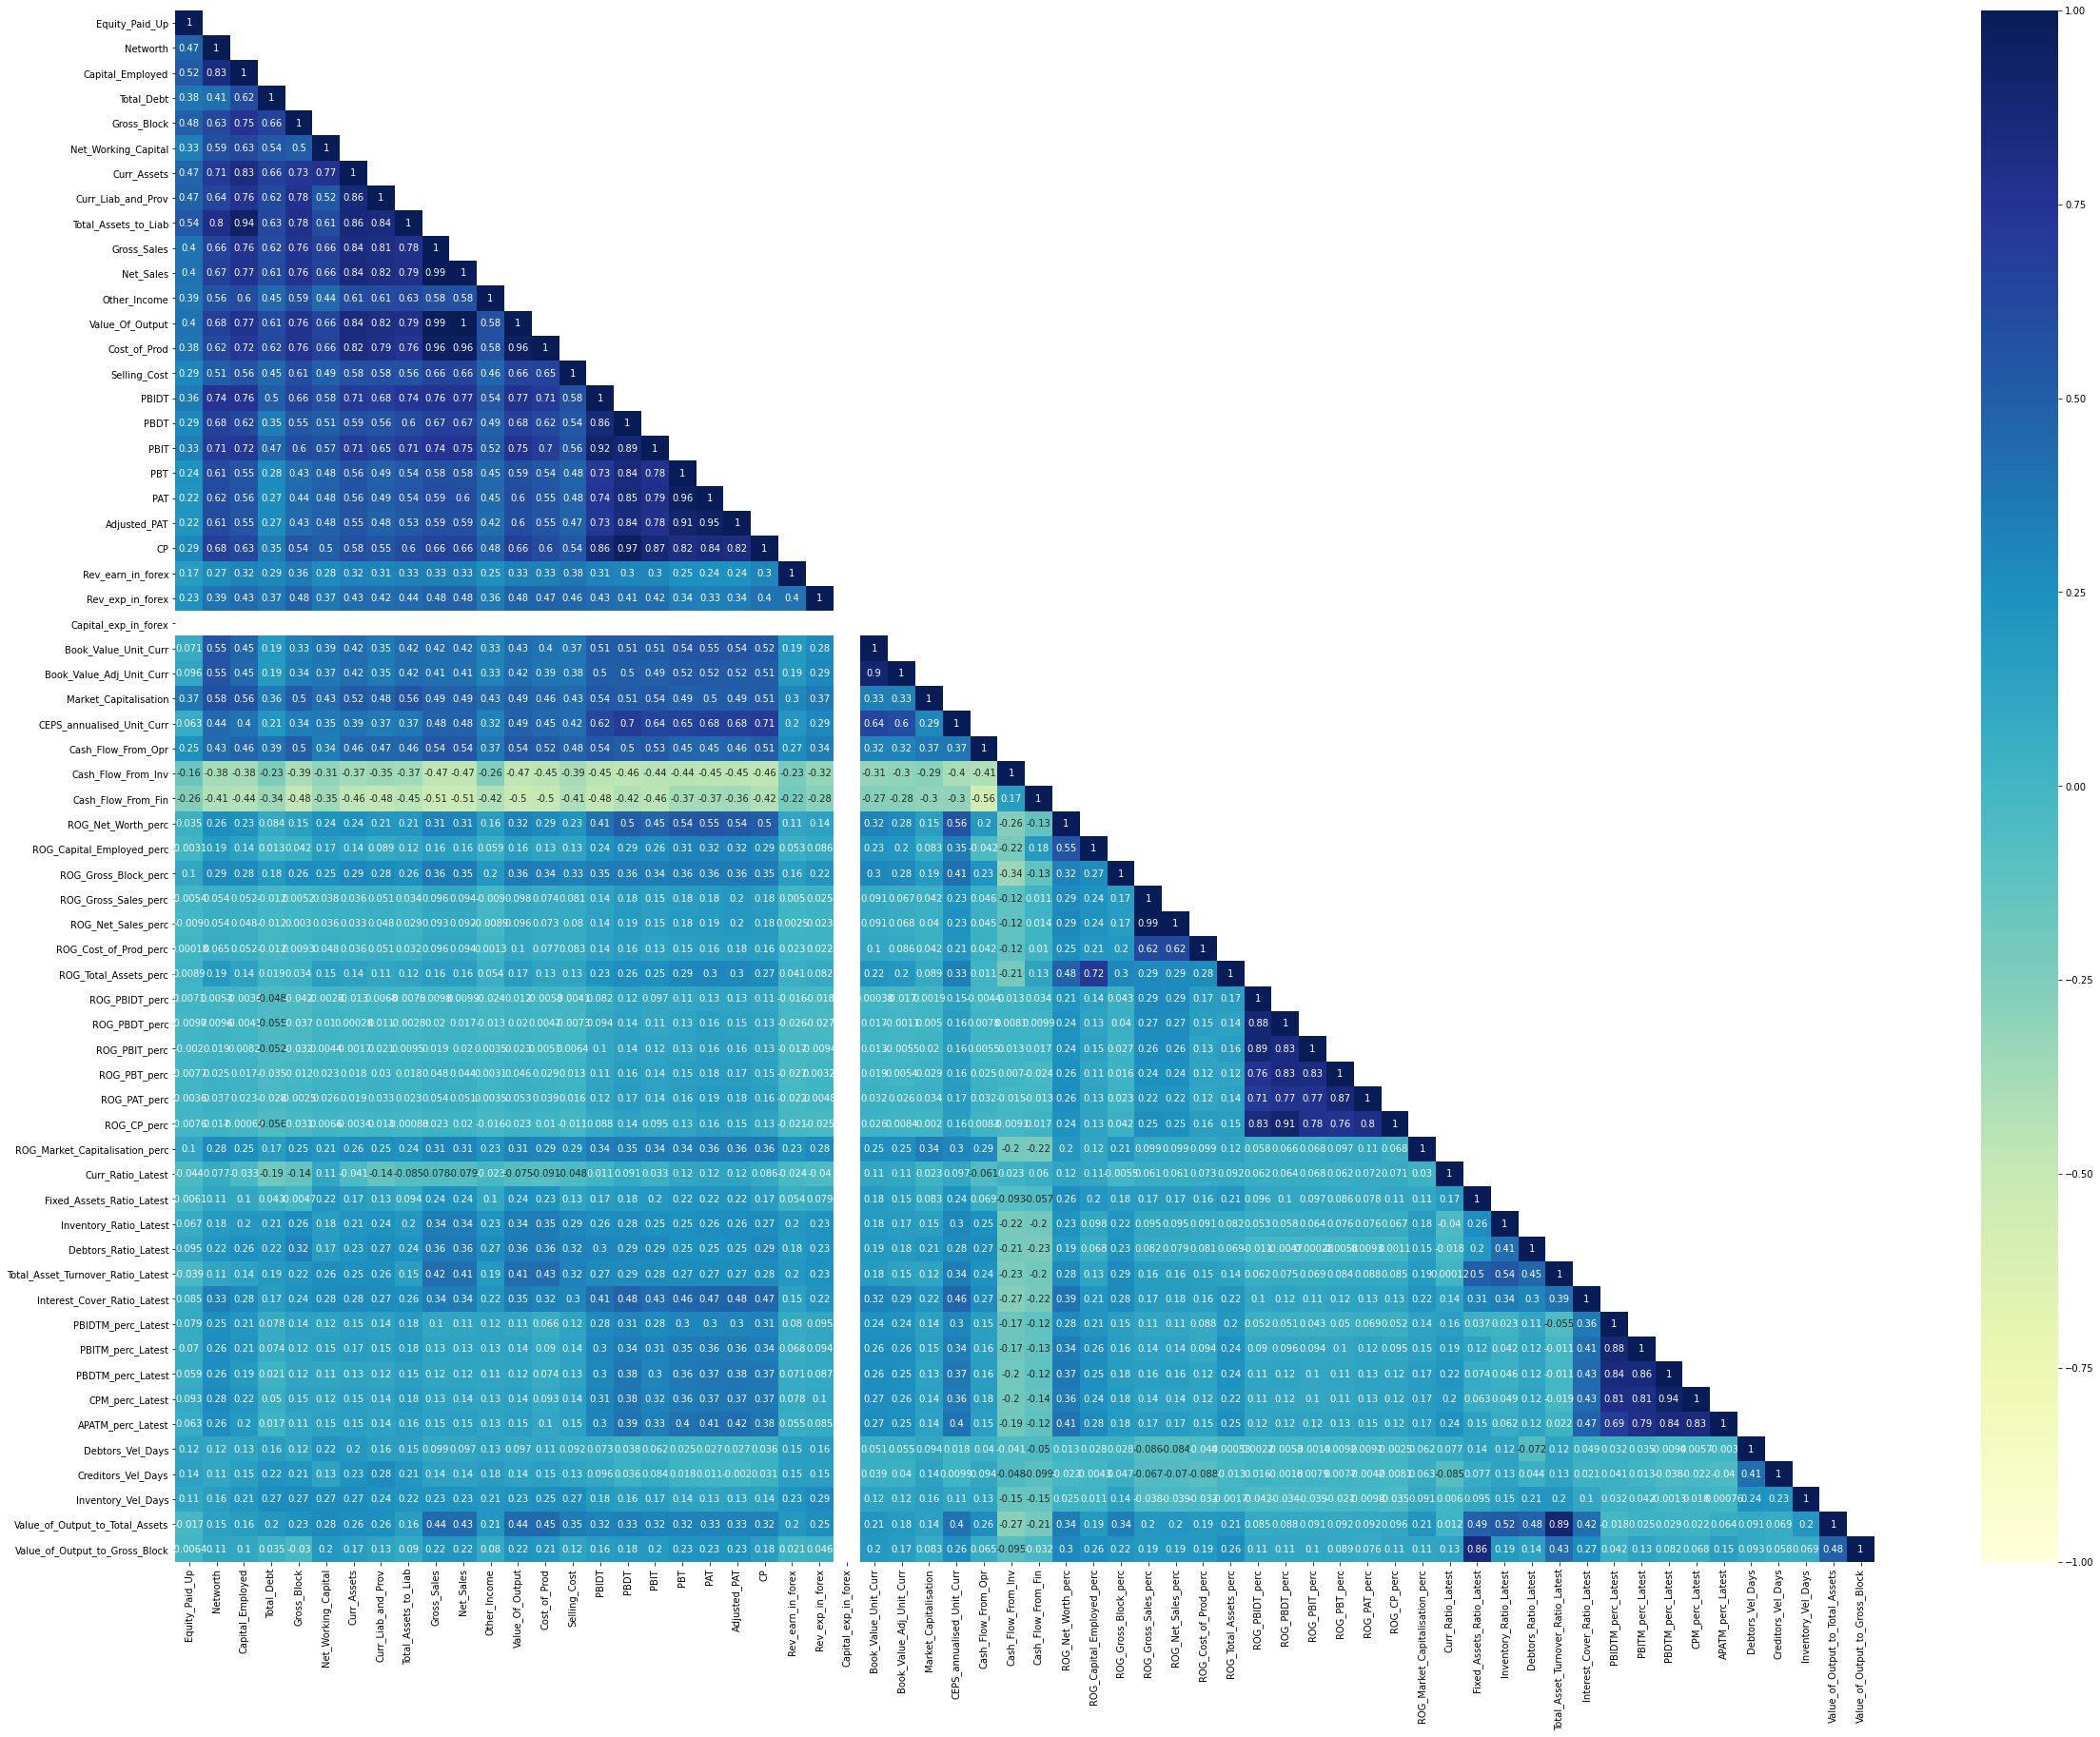

In [138]:
plt.figure(figsize = (40,30))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'YlGnBu', annot=True,vmin = -1, vmax= 1, mask=np.triu(cor_matrix,+1))

Some of the variable is high postively correlated and some of the variables are slightly negative correlated

In [147]:
company_copy=Company_imputed.copy()

model using logistic regression

In [148]:
predictors = Company_imputed.drop('default', axis = 1)
response = Company_imputed['default']

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

Splitting the data into train and test sets

In [150]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.33, random_state = 42)

In [151]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (2402, 62)
The training set for the dependent variable: (2402,)
The test set for the independent variables: (1184, 62)
The test set for the dependent variable: (1184,)


For modeling we will use Logistic Regression with recursive feature elimination

In [152]:
LogR = LogisticRegression()

In [153]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [154]:
selector = selector.fit(X_train, y_train)

In [155]:
selector.n_features_

15

In [156]:
selector.ranking_

array([38,  1,  1,  4,  1, 11, 10,  1,  1, 20, 40, 17,  1,  1, 24,  1,  2,
        1, 13, 15, 16,  3, 46, 21, 48,  1,  1, 18, 47, 45, 14, 32,  1,  1,
       39, 34, 35,  9, 23, 43, 42, 30, 41, 29, 44, 36,  1, 12, 28, 33,  7,
        1, 27,  5, 25, 26,  6, 31, 19, 22,  8, 37])

In [157]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
1,Networth,1
2,Capital_Employed,1
4,Gross_Block,1
7,Curr_Liab_and_Prov,1
8,Total_Assets_to_Liab,1
12,Value_Of_Output,1
13,Cost_of_Prod,1
15,PBIDT,1
17,PBIT,1
25,Book_Value_Unit_Curr,1


In [158]:
from sklearn.metrics import confusion_matrix, classification_report

In [159]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [160]:
print(confusion_matrix(y_train, pred_train))

[[2136   21]
 [  96  149]]


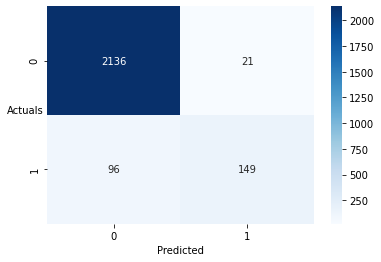

In [161]:
sns.heatmap((metrics.confusion_matrix(y_train, pred_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [162]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2157
         1.0       0.88      0.61      0.72       245

    accuracy                           0.95      2402
   macro avg       0.92      0.80      0.85      2402
weighted avg       0.95      0.95      0.95      2402



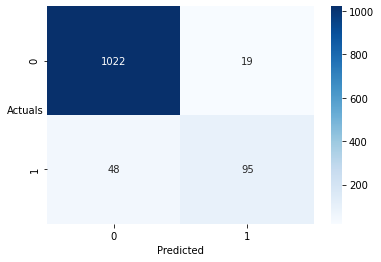

In [163]:
sns.heatmap((metrics.confusion_matrix(y_test, pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [164]:
print(confusion_matrix(y_test, pred_test))

[[1022   19]
 [  48   95]]


In [165]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1041
         1.0       0.83      0.66      0.74       143

    accuracy                           0.94      1184
   macro avg       0.89      0.82      0.85      1184
weighted avg       0.94      0.94      0.94      1184



logregression with 20 features

In [166]:
LogR1 = LogisticRegression()

In [167]:
selector1 = RFE(estimator = LogR1, n_features_to_select=20, step=1)

In [168]:
selector1 = selector1.fit(X_train, y_train)

In [169]:
selector1.n_features_

20

In [170]:
selector1.ranking_

array([33,  1,  1,  1,  1,  6,  5,  1,  1, 15, 35, 12,  1,  1, 19,  1,  1,
        1,  8, 10, 11,  1, 41, 16, 43,  1,  1, 13, 42, 40,  9, 27,  1,  1,
       34, 29, 30,  4, 18, 38, 37, 25, 36, 24, 39, 31,  1,  7, 23, 28,  2,
        1, 22,  1, 20, 21,  1, 26, 14, 17,  3, 32])

In [171]:
df1 = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector1.ranking_})
df1[df1['Rank'] == 1]

,Feature,Rank
1,Networth,1
2,Capital_Employed,1
3,Total_Debt,1
4,Gross_Block,1
7,Curr_Liab_and_Prov,1
8,Total_Assets_to_Liab,1
12,Value_Of_Output,1
13,Cost_of_Prod,1
15,PBIDT,1
16,PBDT,1


In [172]:
pred_train1 = selector1.predict(X_train)
pred_test1 = selector1.predict(X_test)

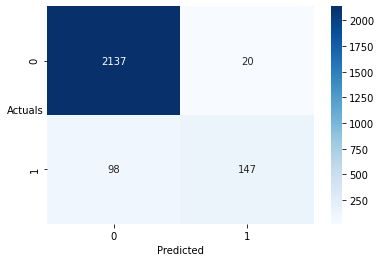

In [173]:
sns.heatmap((metrics.confusion_matrix(y_train, pred_train1)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [174]:
print(classification_report(y_train, pred_train1))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2157
         1.0       0.88      0.60      0.71       245

    accuracy                           0.95      2402
   macro avg       0.92      0.80      0.84      2402
weighted avg       0.95      0.95      0.95      2402



In [175]:
print(confusion_matrix(y_test, pred_test1))

[[1023   18]
 [  46   97]]


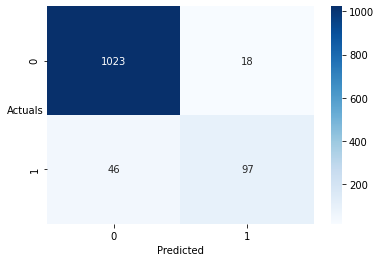

In [176]:
sns.heatmap((metrics.confusion_matrix(y_test, pred_test1)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [177]:
print(classification_report(y_test, pred_test1))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1041
         1.0       0.84      0.68      0.75       143

    accuracy                           0.95      1184
   macro avg       0.90      0.83      0.86      1184
weighted avg       0.94      0.95      0.94      1184



stats model

In [178]:

X = company_copy.drop('default', axis = 1)
y = company_copy['default']

In [179]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [180]:
Default_train1 = pd.concat([X_train, y_train], axis = 1)
Default_test1 = pd.concat([X_test, y_test], axis = 1)

In [181]:
X.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Curr_Assets',
       'Curr_Liab_and_Prov', 'Total_Assets_to_Liab', 'Gross_Sales',
       'Net_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Prod',
       'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT',
       'CP', 'Rev_earn_in_forex', 'Rev_exp_in_forex', 'Capital_exp_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Opr', 'Cash_Flow_From_Inv', 'Cash_Flow_From_Fin',
       'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Prod_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc',
       'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc',
       'ROG_CP_perc', 'ROG_Market_Capitalisation_perc', 'Curr_Ratio_Latest',
       'Fixed_Assets_

In [182]:
import statsmodels.formula.api as SM

In [183]:
df[df['Rank'] == 1]

,Feature,Rank
1,Networth,1
2,Capital_Employed,1
4,Gross_Block,1
7,Curr_Liab_and_Prov,1
8,Total_Assets_to_Liab,1
12,Value_Of_Output,1
13,Cost_of_Prod,1
15,PBIDT,1
17,PBIT,1
25,Book_Value_Unit_Curr,1


In [184]:
model_1 = SM.logit(formula = 'default ~Networth+Capital_Employed+Gross_Block+Curr_Liab_and_Prov+Total_Assets_to_Liab+Value_Of_Output+Cost_of_Prod+PBIDT+PBIT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+Curr_Ratio_Latest+Interest_Cover_Ratio_Latest' , data=Default_train1).fit()

Optimization terminated successfully.
         Current function value: 0.136292
         Iterations 10


In [186]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           15
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.5863
Time:                        15:54:22   Log-Likelihood:                -327.37
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.686e-188
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -5.2239      0.292    -17.872      0.000      -5.797      -4.651
Networth                       -1.5555      0.334     -4.664      0.000      -2.209      -0.902
Capital_Employed               -0.7493      0.309     -2.424      0.015      -1.355      -0.143
Gross_Block                     0.8500      0.228      3.733      0.000       0.404       1.296
Curr_Liab_and_Prov              0.7379      0.236      3.125      0.002       0.275       1.201
Total_Assets_to_Liab            0.7680      0.306      2.509      0.012       0.168       1.368
Value_Of_Output                -1.8154      0.552     -3.290      0.001      -2.897      -0.734
Cost_of_Prod                    1.6849      0.489      3.447      0.001       0.727       2.643
PBIDT                          -1.2197      0.257     -4.745      0.000      -1.724      -0.716
PBIT                            0.9219      0.251      3.670      0.000       0.430       1.414
Book_Value_Unit_Curr           -2.0100      0.544     -3.693      0.000      -3.077      -0.943
Book_Value_Adj_Unit_Curr       -1.5899      0.539     -2.950      0.003      -2.646      -0.533
ROG_Net_Worth_perc             -0.5607      0.149     -3.768      0.000      -0.852      -0.269
ROG_Capital_Employed_perc       0.4830      0.132      3.672      0.000       0.225       0.741
Curr_Ratio_Latest              -1.0811      0.163     -6.639      0.000      -1.400      -0.762
Interest_Cover_Ratio_Latest    -0.7117      0.167     -4.265      0.000      -1.039      -0.385
===============================================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

The parameter estimates table summarizes the effect of each predictor. The ratio of the coefficient to its standard error, squared, equals the Wald statistic. If the significance level of the Wald statistic is small (less than 0.05) then the parameter is useful to the model. The predictors and coefficient values shown shown in the last step are used by the procedure to make predictions.

prediction

In [187]:
y_prob_pred_train = model_1.predict(Default_train1)

In [188]:


y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [189]:
from sklearn import metrics

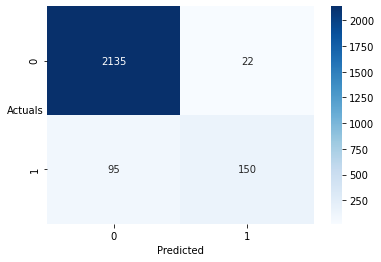

In [190]:
sns.heatmap((metrics.confusion_matrix(Default_train1['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [191]:
from sklearn.metrics import confusion_matrix, classification_report

In [192]:
print(metrics.classification_report(Default_train1['default'], y_class_pred, digits=2))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2157
         1.0       0.87      0.61      0.72       245

    accuracy                           0.95      2402
   macro avg       0.91      0.80      0.85      2402
weighted avg       0.95      0.95      0.95      2402



In [193]:
y_prob_pred_test = model_1.predict(Default_test1)

In [194]:
y_class_pred_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

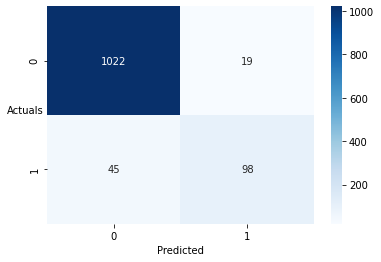

In [195]:
sns.heatmap((metrics.confusion_matrix(Default_test1['default'],y_class_pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [196]:
print(metrics.classification_report(Default_test1['default'], y_class_pred_test, digits=2))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1041
         1.0       0.84      0.69      0.75       143

    accuracy                           0.95      1184
   macro avg       0.90      0.83      0.86      1184
weighted avg       0.94      0.95      0.94      1184



model2

In [197]:
df1[df1['Rank'] == 1]

,Feature,Rank
1,Networth,1
2,Capital_Employed,1
3,Total_Debt,1
4,Gross_Block,1
7,Curr_Liab_and_Prov,1
8,Total_Assets_to_Liab,1
12,Value_Of_Output,1
13,Cost_of_Prod,1
15,PBIDT,1
16,PBDT,1


In [198]:
model_2 = SM.logit(formula = 'default ~Networth+Capital_Employed+Total_Debt+Gross_Block+Net_Working_Capital+Curr_Assets+Total_Assets_to_Liab+Net_Sales+Curr_Liab_and_Prov+Total_Assets_to_Liab+Value_Of_Output+Cost_of_Prod+PBIDT+PBIT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+Curr_Ratio_Latest+Interest_Cover_Ratio_Latest' , data=Default_train1).fit()

Optimization terminated successfully.
         Current function value: 0.134967
         Iterations 10


In [199]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2382
Method:                           MLE   Df Model:                           19
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.5903
Time:                        15:54:30   Log-Likelihood:                -324.19
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.502e-186
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -5.2269      0.293    -17.811      0.000      -5.802      -4.652
Networth                       -1.4307      0.335     -4.270      0.000      -2.087      -0.774
Capital_Employed               -0.8515      0.340     -2.507      0.012      -1.517      -0.186
Total_Debt                      0.3658      0.200      1.833      0.067      -0.025       0.757
Gross_Block                     0.7533      0.248      3.033      0.002       0.267       1.240
Net_Working_Capital            -0.2922      0.257     -1.136      0.256      -0.796       0.212
Curr_Assets                     0.5377      0.388      1.385      0.166      -0.223       1.298
Total_Assets_to_Liab            0.6730      0.343      1.959      0.050      -0.000       1.346
Net_Sales                       1.4277      1.360      1.050      0.294      -1.237       4.092
Curr_Liab_and_Prov              0.4692      0.277      1.692      0.091      -0.074       1.013
Value_Of_Output                -3.0544      1.345     -2.271      0.023      -5.690      -0.419
Cost_of_Prod                    1.3426      0.540      2.486      0.013       0.284       2.401
PBIDT                          -1.2064      0.266     -4.542      0.000      -1.727      -0.686
PBIT                            0.9247      0.258      3.586      0.000       0.419       1.430
Book_Value_Unit_Curr           -1.9934      0.548     -3.640      0.000      -3.067      -0.920
Book_Value_Adj_Unit_Curr       -1.6307      0.544     -2.996      0.003      -2.697      -0.564
ROG_Net_Worth_perc             -0.5467      0.151     -3.629      0.000      -0.842      -0.251
ROG_Capital_Employed_perc       0.4949      0.133      3.715      0.000       0.234       0.756
Curr_Ratio_Latest              -1.0713      0.166     -6.454      0.000      -1.397      -0.746
Interest_Cover_Ratio_Latest    -0.7160      0.168     -4.259      0.000      -1.046      -0.387
===============================================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [200]:
model_3 = SM.logit(formula = 'default ~Networth+Capital_Employed+Total_Debt+Gross_Block+Net_Working_Capital+Curr_Assets+Total_Assets_to_Liab+Curr_Liab_and_Prov+Total_Assets_to_Liab+Value_Of_Output+Cost_of_Prod+PBIDT+PBIT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+Curr_Ratio_Latest+Interest_Cover_Ratio_Latest' , data=Default_train1).fit()

Optimization terminated successfully.
         Current function value: 0.135161
         Iterations 10


In [201]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2383
Method:                           MLE   Df Model:                           18
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.5897
Time:                        15:54:31   Log-Likelihood:                -324.66
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.187e-186
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -5.2268      0.293    -17.832      0.000      -5.801      -4.652
Networth                       -1.4435      0.333     -4.334      0.000      -2.096      -0.791
Capital_Employed               -0.8551      0.339     -2.519      0.012      -1.520      -0.190
Total_Debt                      0.3527      0.200      1.766      0.077      -0.039       0.744
Gross_Block                     0.7289      0.247      2.951      0.003       0.245       1.213
Net_Working_Capital            -0.3018      0.256     -1.181      0.238      -0.803       0.199
Curr_Assets                     0.5605      0.384      1.461      0.144      -0.192       1.313
Total_Assets_to_Liab            0.7139      0.334      2.135      0.033       0.058       1.369
Curr_Liab_and_Prov              0.4598      0.275      1.670      0.095      -0.080       1.000
Value_Of_Output                -1.7834      0.573     -3.115      0.002      -2.906      -0.661
Cost_of_Prod                    1.5069      0.509      2.958      0.003       0.509       2.505
PBIDT                          -1.1938      0.264     -4.518      0.000      -1.712      -0.676
PBIT                            0.9018      0.257      3.513      0.000       0.399       1.405
Book_Value_Unit_Curr           -2.0297      0.547     -3.712      0.000      -3.101      -0.958
Book_Value_Adj_Unit_Curr       -1.5925      0.541     -2.941      0.003      -2.654      -0.531
ROG_Net_Worth_perc             -0.5468      0.150     -3.637      0.000      -0.841      -0.252
ROG_Capital_Employed_perc       0.4921      0.133      3.707      0.000       0.232       0.752
Curr_Ratio_Latest              -1.0720      0.166     -6.461      0.000      -1.397      -0.747
Interest_Cover_Ratio_Latest    -0.7172      0.168     -4.264      0.000      -1.047      -0.388
===============================================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [202]:
model_4 = SM.logit(formula = 'default ~Networth+Capital_Employed+Total_Debt+Gross_Block+Curr_Assets+Total_Assets_to_Liab+Curr_Liab_and_Prov+Total_Assets_to_Liab+Value_Of_Output+Cost_of_Prod+PBIDT+PBIT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+Curr_Ratio_Latest+Interest_Cover_Ratio_Latest' , data=Default_train1).fit()

Optimization terminated successfully.
         Current function value: 0.135447
         Iterations 10


In [ ]:
model_4.summary()

In [119]:
model_5 = SM.logit(formula = 'default ~Networth+Capital_Employed+Total_Debt+Gross_Block+Total_Assets_to_Liab+Curr_Liab_and_Prov+Total_Assets_to_Liab+Value_Of_Output+Cost_of_Prod+PBIDT+PBIT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+Curr_Ratio_Latest+Interest_Cover_Ratio_Latest' , data=Default_train1).fit()

Optimization terminated successfully.
         Current function value: 0.135588
         Iterations 10


In [120]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2385
Method:                           MLE   Df Model:                           16
Date:                Thu, 12 Aug 2021   Pseudo R-squ.:                  0.5884
Time:                        14:54:28   Log-Likelihood:                -325.68
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.587e-188
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -5.2155      0.293    -17.792      0.000      -5.790      -4.641
Networth                       -1.4389      0.331     -4.342      0.000      -2.088      -0.789
Capital_Employed               -0.8939      0.330     -2.710      0.007      -1.540      -0.247
Total_Debt                      0.3401      0.185      1.841      0.066      -0.022       0.702
Gross_Block                     0.7210      0.241      2.995      0.003       0.249       1.193
Total_Assets_to_Liab            0.7836      0.311      2.518      0.012       0.174       1.394
Curr_Liab_and_Prov              0.7046      0.237      2.974      0.003       0.240       1.169
Value_Of_Output                -1.7795      0.571     -3.116      0.002      -2.899      -0.660
Cost_of_Prod                    1.5673      0.511      3.066      0.002       0.565       2.569
PBIDT                          -1.2341      0.260     -4.742      0.000      -1.744      -0.724
PBIT                            0.9450      0.254      3.723      0.000       0.448       1.442
Book_Value_Unit_Curr           -2.0142      0.549     -3.671      0.000      -3.090      -0.939
Book_Value_Adj_Unit_Curr       -1.5880      0.541     -2.936      0.003      -2.648      -0.528
ROG_Net_Worth_perc             -0.5398      0.150     -3.600      0.000      -0.834      -0.246
ROG_Capital_Employed_perc       0.4843      0.131      3.692      0.000       0.227       0.741
Curr_Ratio_Latest              -1.0753      0.163     -6.588      0.000      -1.395      -0.755
Interest_Cover_Ratio_Latest    -0.7193      0.168     -4.287      0.000      -1.048      -0.390
===============================================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [121]:
model_6 = SM.logit(formula = 'default ~Networth+Capital_Employed+Gross_Block+Total_Assets_to_Liab+Curr_Liab_and_Prov+Total_Assets_to_Liab+Value_Of_Output+Cost_of_Prod+PBIDT+PBIT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+Curr_Ratio_Latest+Interest_Cover_Ratio_Latest' , data=Default_train1).fit()

Optimization terminated successfully.
         Current function value: 0.136292
         Iterations 10


In [122]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           15
Date:                Thu, 12 Aug 2021   Pseudo R-squ.:                  0.5863
Time:                        14:54:29   Log-Likelihood:                -327.37
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.686e-188
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -5.2239      0.292    -17.872      0.000      -5.797      -4.651
Networth                       -1.5555      0.334     -4.664      0.000      -2.209      -0.902
Capital_Employed               -0.7493      0.309     -2.424      0.015      -1.355      -0.143
Gross_Block                     0.8500      0.228      3.733      0.000       0.404       1.296
Total_Assets_to_Liab            0.7680      0.306      2.509      0.012       0.168       1.368
Curr_Liab_and_Prov              0.7379      0.236      3.125      0.002       0.275       1.201
Value_Of_Output                -1.8154      0.552     -3.290      0.001      -2.897      -0.734
Cost_of_Prod                    1.6849      0.489      3.447      0.001       0.727       2.643
PBIDT                          -1.2197      0.257     -4.745      0.000      -1.724      -0.716
PBIT                            0.9219      0.251      3.670      0.000       0.430       1.414
Book_Value_Unit_Curr           -2.0100      0.544     -3.693      0.000      -3.077      -0.943
Book_Value_Adj_Unit_Curr       -1.5899      0.539     -2.950      0.003      -2.646      -0.533
ROG_Net_Worth_perc             -0.5607      0.149     -3.768      0.000      -0.852      -0.269
ROG_Capital_Employed_perc       0.4830      0.132      3.672      0.000       0.225       0.741
Curr_Ratio_Latest              -1.0811      0.163     -6.639      0.000      -1.400      -0.762
Interest_Cover_Ratio_Latest    -0.7117      0.167     -4.265      0.000      -1.039      -0.385
===============================================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [123]:
#The coefficients for each of the independent attributes
# The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.


In [124]:
y_prob_pred_train6 = model_6.predict(Default_train1)

In [125]:
y_class_pred6=[]
for i in range(0,len(y_prob_pred_train6)):
    if np.array(y_prob_pred_train6)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred6.append(a)

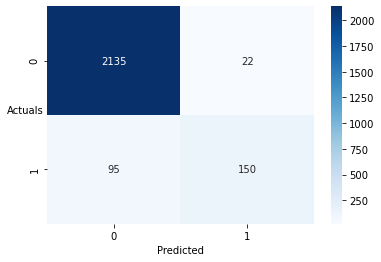

In [126]:
sns.heatmap((metrics.confusion_matrix(Default_train1['default'],y_class_pred6)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [127]:
# Inference:
# Logistic regression
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 2135 False Positive : 22
#False Negative : 95 True Positive : 150
#Test data:
#True Negative : 113 False Positive : 40
#False Negative : 35 True Positive : 268

In [128]:
print(metrics.classification_report(Default_train1['default'], y_class_pred6, digits=2))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2157
         1.0       0.87      0.61      0.72       245

    accuracy                           0.95      2402
   macro avg       0.91      0.80      0.85      2402
weighted avg       0.95      0.95      0.95      2402



In [129]:
#Logistic regression
# Train Data:

### Accuracy: 95%
### precision : 87%
#recall : 87%
#f1  :72%



In [130]:
y_prob_pred_test6 = model_6.predict(Default_test1)


In [131]:
y_class_pred_test6=[]
for i in range(0,len(y_prob_pred_test6)):
    if np.array(y_prob_pred_test6)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_test6.append(a)

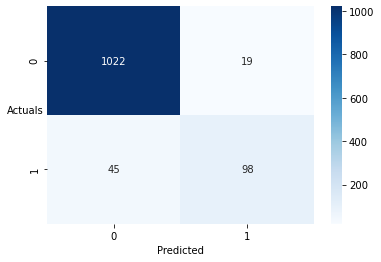

In [132]:
sns.heatmap((metrics.confusion_matrix(Default_test1['default'],y_class_pred_test6)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [133]:
#Test data:
#True Negative : 1022 False Positive : 19
#False Negative : 45 True Positive : 98

In [134]:
print(metrics.classification_report(Default_test1['default'], y_class_pred_test6, digits=2))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1041
         1.0       0.84      0.69      0.75       143

    accuracy                           0.95      1184
   macro avg       0.90      0.83      0.86      1184
weighted avg       0.94      0.95      0.94      1184



In [135]:
# Test Data:

### Accuracy: 95%
### precision: 84%
#recall : 69%
#f1 :75%

Smote

In [195]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [196]:
selector_smote = selector.fit(X_res, y_res)

In [197]:
selector_smote.n_features_

15

In [198]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [199]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      2157
         1.0       0.91      0.93      0.92      2157

    accuracy                           0.92      4314
   macro avg       0.92      0.92      0.92      4314
weighted avg       0.92      0.92      0.92      4314



In [200]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93      1041
         1.0       0.51      0.95      0.66       143

    accuracy                           0.88      1184
   macro avg       0.75      0.91      0.79      1184
weighted avg       0.93      0.88      0.90      1184



In [201]:
selector_smote1 = selector1.fit(X_res, y_res)

In [202]:
selector_smote1.n_features_

20

In [203]:
pred_train_smote1 = selector_smote1.predict(X_res)
pred_test_smote1 = selector_smote1.predict(X_test)

In [204]:
print(classification_report(y_res, pred_train_smote1))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      2157
         1.0       0.92      0.93      0.92      2157

    accuracy                           0.92      4314
   macro avg       0.92      0.92      0.92      4314
weighted avg       0.92      0.92      0.92      4314



In [205]:
print(classification_report(y_test, pred_test_smote1))

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93      1041
         1.0       0.50      0.93      0.65       143

    accuracy                           0.88      1184
   macro avg       0.74      0.90      0.79      1184
weighted avg       0.93      0.88      0.89      1184

